Link to git repository: https://github.com/ongiboy/Cognitive-Social-Science

Group members:
* Christian Ong Hansen (s204109)
* Kavus Latifi Yaghin (s214601)
* Daniel Damkjær Ries (s214641)

Group member's contribution:
* Every task was made in collaboration by all members.

# Part 1: Properties of the real-world network of Computational Social Scientists

### Exercise: Analyzing networks through a random model

#### 1. Random network

In [2]:
# Import libraries
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from netwulf import visualize
import random
import copy
import tqdm
import scipy

In [10]:
# First import our network from json file.
with open('data\graph_data.json') as f:
    social_graph = json.load(f)

social_graph = nx.json_graph.node_link_graph(social_graph)



In [4]:
# Find number of nodes and edges
num_nodes = social_graph.number_of_nodes()
num_edges = social_graph.number_of_edges()

print("Number of nodes: ", num_nodes)
print("Number of edges: ", num_edges)

Number of nodes:  12578
Number of edges:  47712


In [5]:
# We have a graph with 12578 nodes and 47712 edges
N = num_nodes
L = num_edges

# Compute the probability that makes the expected number of edges equal to the actual number of edges in the graph.
p = 2*L/(N*(N-1))
print("Prob:",p)

# Compute average degree of the graph
k = 2*L/N
print("Average degree:",k)

Prob: 0.0006032106020837543
Average degree: 7.586579742407378


In [6]:
# Write a function to generate a random network in terms of node count N and probability p.
# Generate a random network by linking nodes in every possible pair with probability p.
def generate_random_network(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i+1, N):
            if np.random.uniform() < p:
                G.add_edge(i, j)
    return G

G = generate_random_network(N, p)

In [26]:
# Visualize the random network with netwulf
visualize(G)

(None, None)

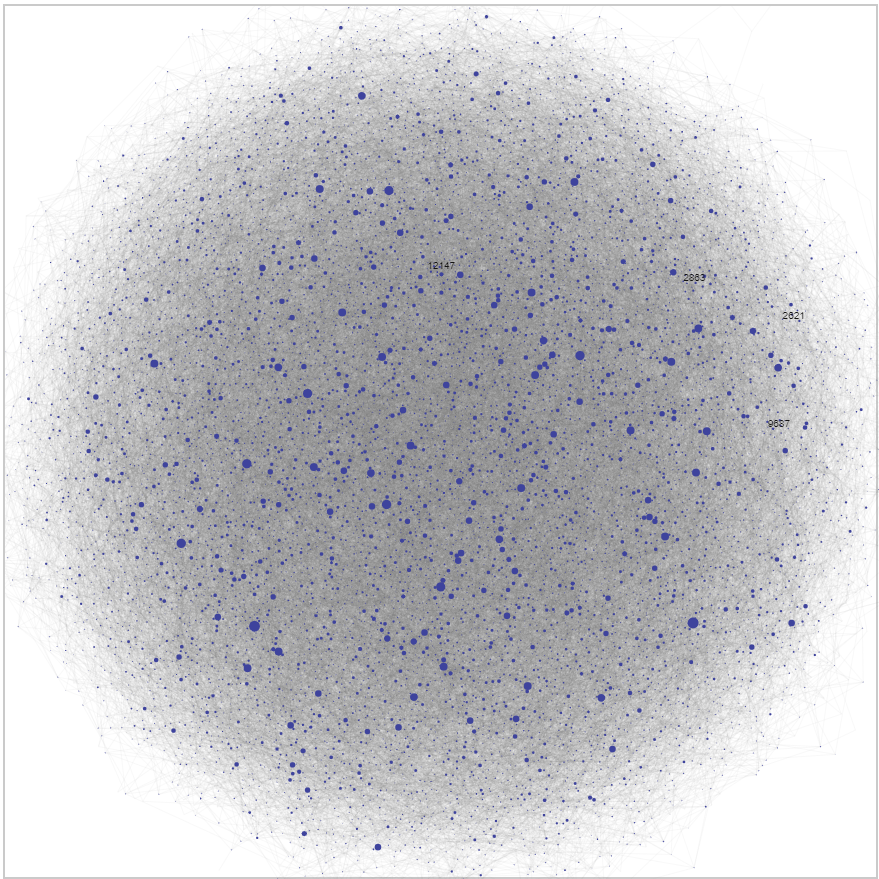

In [ ]:
# Replace inf, -inf and NaN values in node attributes
for node, data in social_graph.nodes(data=True):
    for key, value in data.items():
        if isinstance(value, float):
            if np.isinf(value) or np.isnan(value):
                data[key] = 0  # or any other value that makes sense in your context

visualize(social_graph)

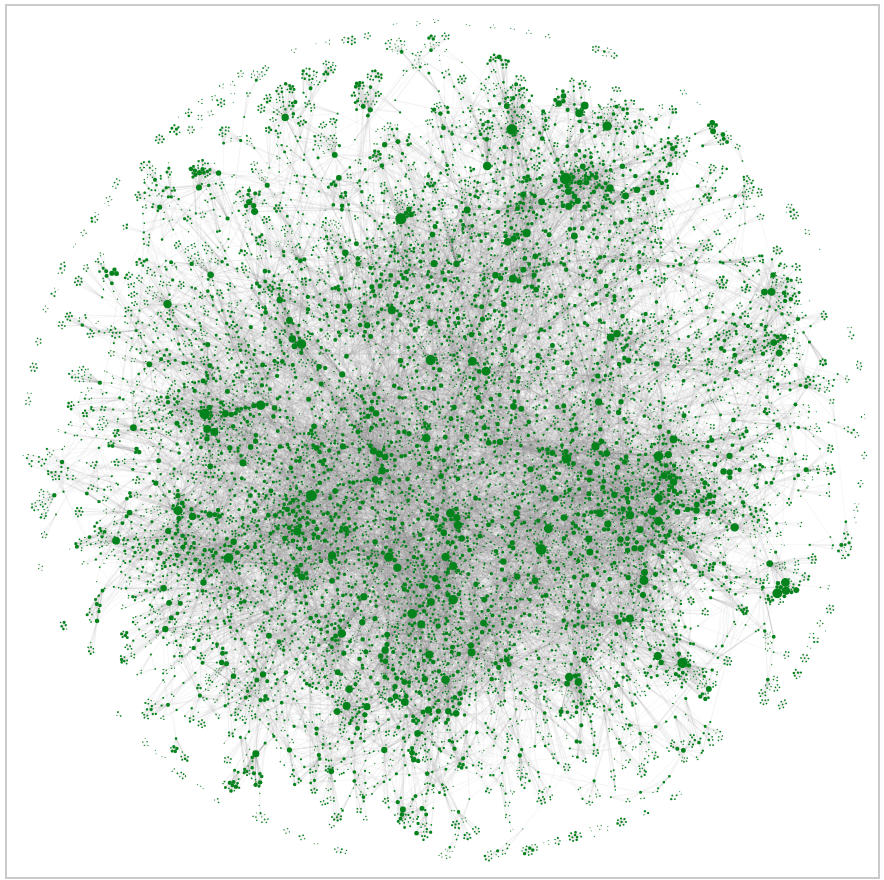

In [16]:
# Check which regime the random network falls into
# If <k> < 1, it is in the subcritical regime
# If <k> = 1, it is in the critical regime
# If <k> > 1, it is in the supercritical regime
# If <k> > ln(N), it is in the connected regime

# Compute average degree of the random network
k = 2*L/N

# Compute the natural logarithm of N
ln_N = np.log(N)

print("Average degree of the random network:", k)
print("Natural logarithm of N:", ln_N)

Average degree of the random network: 7.586579742407378
Natural logarithm of N: 9.439704535103449


Answer the following questions (max 200 words in total):

What regime does your random network fall into? Is it above or below the critical threshold?
* As the average degree is 7.59 and thus <k> > 1, but it is not larger than ln(N), the random network must fall into the supercritical regime. The network is above the critical threshold.

According to the textbook, what does the network's structure resemble in this regime?
* The giant component contains the majority of the nodes, but there are still numerous isolated components. This regime lasts until all nodes are absorbed by the giant component.

Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
* The key difference between the networks is the clustering. The actual network forms numerous clusters with connectivity internally, while the random network seems to have a lot of asystematic connections between nodes wherever.

#### 2. Degree distribution

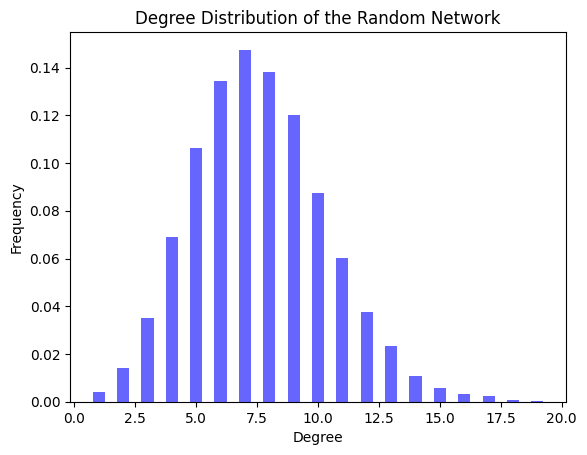

In [19]:
# Compute the degree distribution of the random network
degree_sequence_random = [d for n, d in G.degree()]
hist_random, bins_random = np.histogram(degree_sequence_random, bins=range(1, max(degree_sequence_random)+2), density=True)

# Plot the degree distribution of the random network
plt.bar(bins_random[:-1], hist_random, width=0.5, color='b', alpha=0.6)
plt.title('Degree Distribution of the Random Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

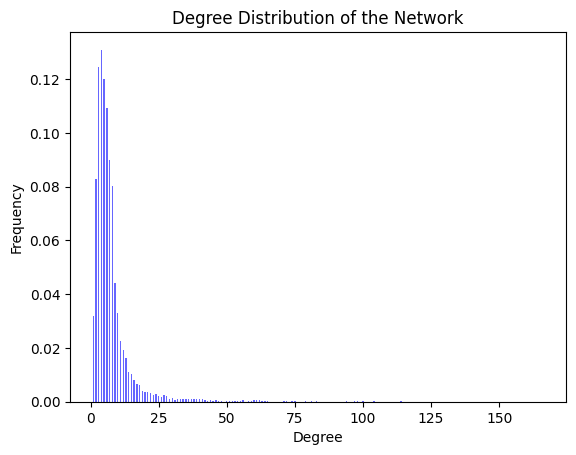

In [20]:
# Compute the degree distribution of the Computational Social Scientists network
degree_sequence = [d for n, d in social_graph.degree()]
hist, bins = np.histogram(degree_sequence, bins=range(1, max(degree_sequence)+2), density=True)

# Plot the degree distribution of the network
plt.bar(bins[:-1], hist, width=0.5, color='b', alpha=0.6)
plt.title('Degree Distribution of the Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

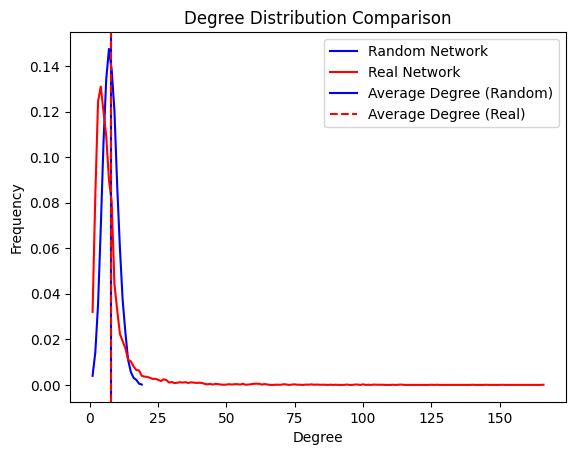

In [21]:
# Plot the degree distribution of the random network
plt.plot(bins_random[:-1], hist_random, '-b', label='Random Network')

# Plot the degree distribution of the real network
plt.plot(bins[:-1], hist, '-r', label='Real Network')

# Add vertical lines for the average degree of the random and real networks
plt.axvline(np.mean(degree_sequence_random), color='b', linestyle='-', label='Average Degree (Random)')
plt.axvline(np.mean(degree_sequence), color='r', linestyle='--', label='Average Degree (Real)')

# Set the x and y axis labels
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Degree Distribution Comparison')

# Add a legend
plt.legend()

# Show the plot
plt.show()

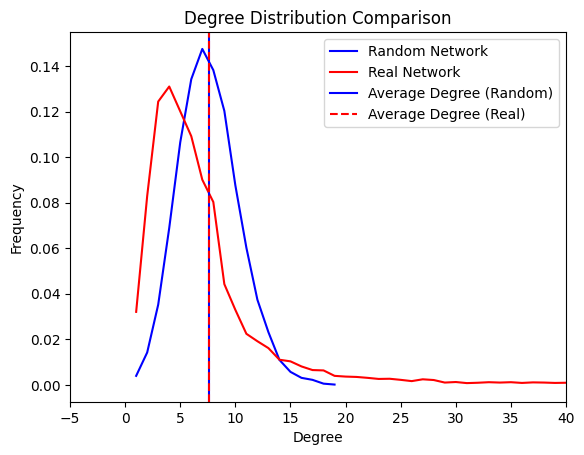

In [22]:
# Plot the degree distribution of the random network
plt.plot(bins_random[:-1], hist_random, '-b', label='Random Network')

# Plot the degree distribution of the real network
plt.plot(bins[:-1], hist, '-r', label='Real Network')

# Add vertical lines for the average degree of the random and real networks
plt.axvline(np.mean(degree_sequence_random), color='b', linestyle='-', label='Average Degree (Random)')
plt.axvline(np.mean(degree_sequence), color='r', linestyle='--', label='Average Degree (Real)')

# Set the x and y axis labels
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Cut the x-axis
plt.xlim(-5, 40)

# Set the title of the plot
plt.title('Degree Distribution Comparison')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Answer the following questions (max 200 words in total):

Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.
* No, it does not really capture the network's characteristics, as the means are the same for both, even though one is normally distributed and the other is heavy tailed.

What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties?
* We see above that for the random network there are no nodes with degree above 20, but in the real network it goes all the way up to 160. This tells us that in the real world networks hubs are formed, which does not happen in the random network. 

# Part 2 Network Analysis in Computational Social Science

### Exercise 1: Mixing patterns and assortativity

##### Part 1: Assortativity coefficient

In [46]:
def calculate_assortativity(G):
    e_mu = 0

    for link in G.edges():
        if G.nodes[link[0]]['country'] == G.nodes[link[1]]['country']:
            e_mu += 1

    e_mu = e_mu / G.number_of_edges()
    # print(e_mu)

    # Dictionary of the countries as keys and 0 as values
    country_dict = {}
    for node in G.nodes():
        country = G.nodes[node]['country']
        if country not in country_dict:
            country_dict[country] = 0

    for country in country_dict:
        for node in G.nodes():
            if G.nodes[node]['country'] == country:
                country_dict[country] += G.degree[node]

    # Sum the squares of the degrees of the nodes of each country
    a_mu = 0
    for country in country_dict:
        a_mu += (country_dict[country] / (2*G.number_of_edges()) )**2

    # print(a_mu)

    # Calculate the Assortativity Coefficient
    r = (e_mu - a_mu) / (1 - a_mu)
    # print(r)
    return r

print("The assortativity coefficient: ",calculate_assortativity(social_graph))

The assortativity coefficient:  0.41163383864694114


##### Part 2: Configuration model

In [49]:
def double_edge_swap(network, batch_size=1000):
    new_network = copy.deepcopy(network)
    for _ in range(10):
        total_edges = network.number_of_edges()
        edge_list = list(new_network.edges())
        random.shuffle(edge_list)
        batches = [edge_list[i:i+batch_size*2] for i in range(0, total_edges, batch_size*2)]

        for old_edges in batches:
            new_edges = []
            for i in range(0, len(old_edges), 2):
                if i+1 >= len(old_edges):
                    continue
                e1, e2 = old_edges[i], old_edges[i+1]
                u, v = e1
                x, y = e2

                if u == y or v == x:
                    continue

                if random.random() < 0.5:
                    e1 = (v, u)
                new_edges.append((e1[0], e2[1]))
                new_edges.append((e2[0], e1[1]))

            if any(edge in new_network.edges() for edge in new_edges):
                continue

            new_network.remove_edges_from(old_edges)
            new_network.add_edges_from(new_edges)

    return new_network

# Create a new network with the double_edge_swap function
G_double_edge_swap = double_edge_swap(social_graph)

In [51]:
# Calculate the degree distributions of the original network and the randomized network
degree_dist_original = [degree for node, degree in social_graph.degree()]
degree_dist_randomized = [degree for node, degree in G_double_edge_swap.degree()]

# Compare the degree distributions
if degree_dist_original == degree_dist_randomized:
    print("The degree distributions of the original network and the randomized network are the same.")
else:
    print("The degree distributions of the original network and the randomized network are different.")

print(degree_dist_original)
print(degree_dist_randomized)

# Check where the degree distributions are different
for i in range(len(degree_dist_original)):
    if degree_dist_original[i] != degree_dist_randomized[i]:
        print(f"The degree of node {i} is different in the original and the randomized network.")
        print(f"Original: {degree_dist_original[i]}")
        print(f"Randomized: {degree_dist_randomized[i]}")

The degree distributions of the original network and the randomized network are the same.
[60, 18, 12, 35, 18, 16, 61, 2, 8, 65, 31, 11, 14, 98, 59, 30, 6, 3, 27, 25, 10, 0, 5, 8, 31, 41, 70, 18, 44, 80, 60, 38, 82, 22, 2, 45, 127, 104, 34, 18, 38, 0, 61, 18, 39, 39, 71, 100, 6, 24, 15, 25, 9, 16, 28, 100, 41, 145, 5, 18, 0, 49, 46, 4, 54, 40, 35, 22, 7, 2, 64, 61, 53, 37, 31, 72, 9, 60, 140, 25, 36, 30, 3, 37, 28, 23, 8, 1, 13, 10, 61, 17, 114, 53, 83, 1, 0, 15, 41, 21, 27, 35, 24, 26, 6, 71, 9, 12, 0, 19, 13, 111, 88, 125, 62, 4, 37, 98, 36, 104, 105, 84, 28, 0, 22, 0, 75, 33, 9, 26, 6, 51, 59, 4, 33, 21, 28, 20, 23, 65, 3, 28, 7, 0, 24, 90, 8, 7, 7, 13, 60, 100, 0, 60, 45, 64, 13, 22, 3, 6, 15, 94, 10, 17, 72, 21, 10, 10, 0, 9, 23, 27, 27, 37, 106, 47, 69, 107, 62, 32, 14, 86, 63, 102, 62, 56, 39, 63, 5, 114, 31, 64, 24, 5, 71, 19, 54, 5, 6, 38, 25, 22, 15, 9, 6, 13, 10, 16, 15, 9, 12, 12, 18, 8, 10, 18, 85, 9, 23, 6, 54, 6, 16, 6, 8, 1, 24, 43, 3, 17, 24, 9, 5, 4, 18, 33, 10, 9, 15

##### Part 3: Analyzing Assortativity in Random Networks

In [53]:
# Generate and analyze 100 random networks
random_networks = []
assortativity_values = []

for _ in tqdm.tqdm(range(100)):
    random_network = double_edge_swap(social_graph)
    random_networks.append(random_network)
    assortativity = calculate_assortativity(random_network)
    assortativity_values.append(assortativity)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [04:47<00:00,  2.87s/it]


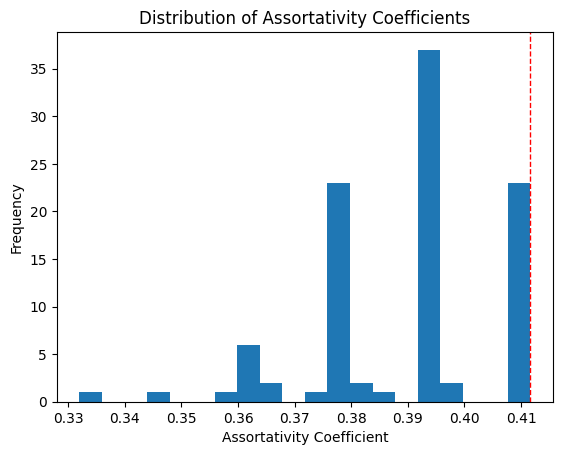

Original assortativity:  0.41163383864694114
Max random assortativity:  0.41163383864694114
Min random assortativity:  0.3319834784515849
Connections within the same country are significantly higher than chance.


In [61]:
# Plot the distribution of assortativity values
plt.hist(assortativity_values, bins=20)
# PLot the assortativity of the original network
plt.axvline(x=calculate_assortativity(social_graph), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Assortativity Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Assortativity Coefficients')
plt.show()

# Compare the assortativity of the original network with the distribution of random networks
original_assortativity = calculate_assortativity(social_graph)
mean_random_assortativity = np.mean(assortativity_values)

print("Original assortativity: ", original_assortativity)
print("Max random assortativity: ", max(assortativity_values))
print("Min random assortativity: ", min(assortativity_values))



if original_assortativity > mean_random_assortativity:
    print("Connections within the same country are significantly higher than chance.")
else:
    print("Connections within the same country are not significantly higher than chance.")

##### Part 4: Assortativity by Degree

In [68]:
# The formula for degree assortativity is:
# r = (<ku*kv> - <ku>*<kv>) / (sqrt( <ku^2> - <ku>^2 ) * sqrt( <kv^2> - <kv>^2 ) )
# where ku and kv are the degrees of the nodes at the end of the edge, and the <> brackets denote the average over all edges.

# Calculate the degree assortativity of the network
def calculate_degree_assortativity(G):

    # Calculate the averages
    ku = np.mean([G.degree[edge[0]] for edge in G.edges()])
    kv = np.mean([G.degree[edge[1]] for edge in G.edges()])
    ku2 = np.mean([G.degree[edge[0]]**2 for edge in G.edges()])
    kv2 = np.mean([G.degree[edge[1]]**2 for edge in G.edges()])
    kukv = np.mean([G.degree[edge[0]]*G.degree[edge[1]] for edge in G.edges()])

    # Calculate the degree assortativity
    r = (kukv - (ku*kv)) / (np.sqrt(ku2 - (ku**2)) * np.sqrt(kv2 - (kv**2)))
    return r

print("The degree assortativity coefficient: ",calculate_degree_assortativity(social_graph))

The degree assortativity coefficient:  -0.043808890406391146


In [74]:
# Compare the degree assortativity of the original network with the random networks
random_degree_assortativity_values = []

for random_network in random_networks:
    random_degree_assortativity = calculate_degree_assortativity(random_network)
    random_degree_assortativity_values.append(random_degree_assortativity)


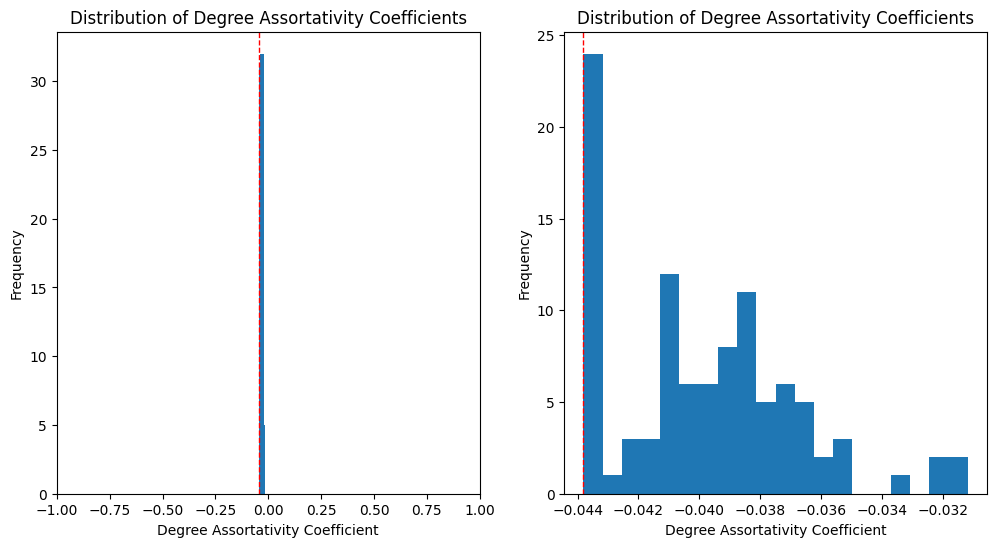

In [106]:
# Plot the distribution of degree assortativity values
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].hist(random_degree_assortativity_values, bins=5, width=0.02)
ax[0].axvline(x=calculate_degree_assortativity(social_graph), color='red', linestyle='dashed', linewidth=1)
ax[0].set_xlabel('Degree Assortativity Coefficient')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(-1, 1)
ax[0].set_title('Distribution of Degree Assortativity Coefficients')

# Plot the degree assortativity of the original network
ax[1].hist(random_degree_assortativity_values, bins=20)
ax[1].axvline(x=calculate_degree_assortativity(social_graph), color='red', linestyle='dashed', linewidth=1)
ax[1].set_xlabel('Degree Assortativity Coefficient')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of Degree Assortativity Coefficients')

plt.show()

Reflection questions (max 250 words for the 3 questions)

Assortativity by degree. Were the results of the degree assortativity in line with your expectations? Why or why not?
* The negative degree assortativity coefficient is not really in line with our expectations, as we expected the coefficient to be slightly positive. We thought the Computational Social Scientist network would have the same characteristics as a social network, which typically tend to be assortative, i.e. popular/renowned scientists would collaborate with other popular authors. 

Edge flipping. In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing e_1 from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?
* Since the node-pair for each edge is always sorted, we flip one of the pairs 50% of the time so the double edge swap is ensured to be random (rather than always creating edges between the 2 lower numerated nodes and the 2 higher numerated nodes).

Distribution of assortativity in random networks. Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.
* The distribution of degree assortativity for the random networks is negative, but of so small scale that it is basically 0. We expected, that the degree assortativity for the random networks would be distributed around 0, as the connections should be random. The configuration model and edge flipping should shift the assortativity towards 0, as it becomes more random and the previous assortativity pattern disappears. This is why our assortativity distribution for the random networks are all between 0 and the degree assortativity for the actual network.

##### 2.2 Central nodes

Find the 5 most central scientists according to the closeness centrality.

In [24]:
# Calculate the closeness centrality of the network
closeness_centrality = nx.closeness_centrality(social_graph)


In [25]:
# Sort the scientists according to the closeness centrality
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the 5 most central scientists according to the closeness centrality
for i in range(5):
    print(f"{i+1}. {sorted_closeness_centrality[i][0]}: {sorted_closeness_centrality[i][1]}")


1. https://openalex.org/A5067118505: 0.2453429768353368
2. https://openalex.org/A5021346979: 0.24481401214866733
3. https://openalex.org/A5048877432: 0.24468212717848595
4. https://openalex.org/A5034372799: 0.24444407998375628
5. https://openalex.org/A5084282503: 0.24421154570302064


What role do you imagine scientists with high closeness centrality play?
* Scientists with high closeness centrality are central and have a strong network. Through few links they can reach a large part of the network, meaning they are popular and/or have close relations that have even further connections in the network.

Find the 5 most central scientists according to eigenvector centrality.


In [26]:
# Calculate the eigenvector centrality of the network
eigenvector_centrality = nx.eigenvector_centrality(social_graph)

In [27]:
# Sort the scientists according to the eigenvector centrality
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the 5 most central scientists according to the eigenvector centrality
for i in range(5):
    print(f"{i+1}. {sorted_eigenvector_centrality[i][0]}: {sorted_eigenvector_centrality[i][1]}")

1. https://openalex.org/A5046546654: 0.18494499052423663
2. https://openalex.org/A5031799782: 0.17873112447611808
3. https://openalex.org/A5021346979: 0.17438075876746456
4. https://openalex.org/A5084793824: 0.15381062763920042
5. https://openalex.org/A5039841997: 0.1536728805422141


Plot the closeness centrality of nodes vs their degree. 

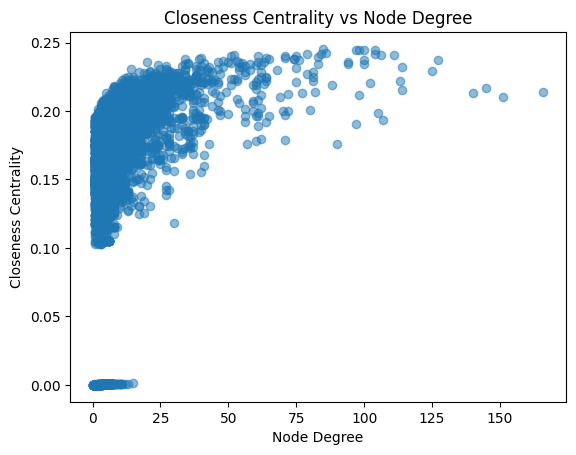

In [28]:
# Plot the closeness centrality vs node degree to see if there is a correlation
closeness_centrality_values = list(closeness_centrality.values())
degree_values = list(dict(social_graph.degree()).values())

plt.scatter(degree_values, closeness_centrality_values, alpha=0.5)
plt.xlabel('Node Degree')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality vs Node Degree')
plt.show()

Is there a correlation between the two? Did you expect that? Why?
* There is definitely a tendency. Higher degree nodes seem to have a higher closeness centrality, which is also supported by the calculated correlation of 0.48. It is as expected, since people with many connections tend to be more central and can reach others more easily. 

Repeat the two points above using eigenvector centrality instead.

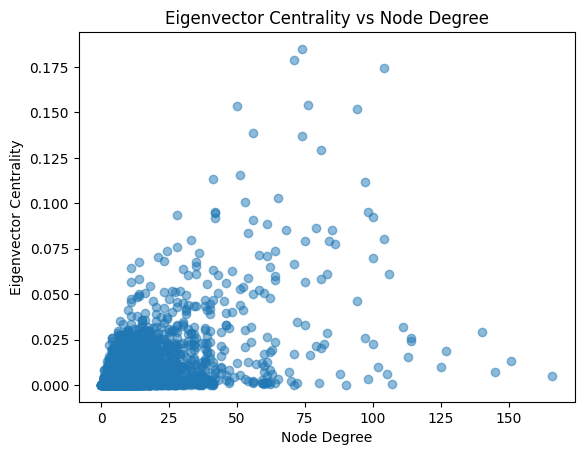

In [29]:
# Plot the eigenvector centrality vs node degree to see if there is a correlation
eigenvector_centrality_values = list(eigenvector_centrality.values())

plt.scatter(degree_values, eigenvector_centrality_values, alpha=0.5)
plt.xlabel('Node Degree')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality vs Node Degree')
plt.show()

Do you observe any difference? Why?
* From the plot, the tendency is less clear. It does not look like a higher node degree results in a higher eigenvector centrality. Using the closeness centrality, it makes sense that strong nodes have a high centrality, because they can reach a lot of nodes easily. Using the eigenvector centrality measurement, the correlation seems smaller, because weaker nodes might still have important connections and strong nodes might have unimportant connections. 

# Part 3 - Words that characterize Computational Social Science communities

##### 3.1 TF-IDF and the Computational Social Science communities.

First, check out the wikipedia page for TF-IDF. Explain in your own words the point of TF-IDF.

What does TF stand for?
* TF stands for Term Frequency, which is a counter of a term, e.g. the TF of the word Hello in a document would be the amount of times the word Hello appears in the document.

What does IDF stand for?
* IDF stands for Inverse Document Frequency, Which is determined by dividing the total number of documents by the number of documents that contains the term, and then taking the logarithm of it. Therefore a high IDF for a term will mean that the term is rare across the corpus, and is therefore a way of highligting more unique words. It is also a way of weighing down very common words.

The point of TF-IDF?
* The TF-IDF of a term is the product of the TF and the IDF of the term. A high value of TF-IDF will mean that the term has more appearences in the document but is rare across the corpus. Therefore the words with a high TF-IDF, are a good tool for characterizing and distinguishing documents, as they represent words that are frequent within a document and unique across the corpus.

In [2]:
import pandas as pd
import ast
import math
from collections import defaultdict
from collections import Counter

# Load the data
communities_df = pd.read_csv("data/author_communities.csv")
papers_df = pd.read_csv("data/papers_final.csv")
abstracts_df = pd.read_csv("data/abstracts_tokens.csv", converters={'tokens': ast.literal_eval})

In [3]:
# Ensure 'authors' column is a list
papers_df['authors'] = papers_df['authors'].apply(lambda x: x if isinstance(x, list) else ast.literal_eval(x))

# Explode 'authors' column
papers_exploded = papers_df.explode('authors')

# Create new dataframe with unique authors and their works
authors_works_df = papers_exploded.groupby('authors')['id'].agg(list).reset_index()

# Rename columns
authors_works_df.columns = ['Author', 'Works']

In [5]:
# Merge authors_works_df with communities_df
df = pd.merge(authors_works_df, communities_df, on='Author')

# Explode 'Works' column
df = df.explode('Works')

# Merge with abstracts_df
df = pd.merge(df, abstracts_df, left_on='Works', right_on='id')

# Get abstract tokens for all communities
all_communities_abstracts = df.groupby('Community')['tokens'].agg("sum").reset_index()

# Rename columns
all_communities_abstracts.columns = ['Community', 'Abstract Tokens']

In [11]:
# Get the top 5 communities
top5_communities = communities_df['Community'].value_counts().nlargest(5).index

# Filter all_communities_abstracts for top 5 communities
top5_communities_abstracts = all_communities_abstracts[all_communities_abstracts['Community'].isin(top5_communities)]

# Initialize a dictionary to store the top 5 terms for each community
top_terms = {}

# For each community in the top 5 communities
for community in top5_communities:
    # Get the abstract tokens for the community
    abstract_tokens = top5_communities_abstracts[top5_communities_abstracts['Community'] == community]['Abstract Tokens'].values[0]
    
    # Count the frequency of each term
    term_counts = Counter(abstract_tokens)
    
    # Get the top 5 terms
    top_terms[community] = term_counts.most_common(5)

In [14]:
for item in top_terms.items():
    print(f"Community {item[0]}:")
    print(f"Top 5 terms: {item[1]}\n")

Community 18:
Top 5 terms: [('model', 1854), ('use', 1729), ('data', 1084), ('network', 1065), ('task', 1031)]

Community 17:
Top 5 terms: [('network', 2283), ('model', 1505), ('use', 988), ('time', 985), ('social', 966)]

Community 30:
Top 5 terms: [('network', 2218), ('model', 1999), ('social', 1689), ('data', 1484), ('use', 1459)]

Community 0:
Top 5 terms: [('use', 969), ('model', 919), ('misinform', 810), ('inform', 803), ('peopl', 793)]

Community 10:
Top 5 terms: [('user', 1447), ('use', 1374), ('data', 1202), ('inform', 764), ('model', 715)]



Describe similarities and differences between the communities.
* It is common for all of the five top communities that the terms model and use are included in their top 5 most frequent terms. They also share other terms across multiple communities 

Why are the TFs not necessarily a good description of the communities?

In [7]:
# Get the top 5 communities
top5_communities = communities_df['Community'].value_counts().nlargest(5).index

# Filter all_communities_abstracts for top 5 communities
top5_communities_abstracts = all_communities_abstracts[all_communities_abstracts['Community'].isin(top5_communities)]

# Get the total number of documents
num_docs = len(top5_communities_abstracts)

# Initialize a dictionary to store the document frequency for each word
df = defaultdict(int)

# For each document
for tokens in top5_communities_abstracts['Abstract Tokens']:
    # Get the unique words in the document
    unique_words = set(tokens)
    
    # For each unique word, increment its document frequency
    for word in unique_words:
        df[word] += 1

# Initialize a dictionary to store the IDF for each word
idf = {}

# For each word in the document frequency dictionary
for word, freq in df.items():
    # Calculate the IDF and store it in the dictionary
    idf[word] = math.log(num_docs / freq)

idf

{'bird': 1.6094379124341003,
 'engag': 0.0,
 'variou': 0.0,
 'linden': 1.6094379124341003,
 'heed': 1.6094379124341003,
 'riski': 0.22314355131420976,
 'sob': 1.6094379124341003,
 'earli': 0.0,
 'late': 0.0,
 'segreg': 0.0,
 '18th': 0.9162907318741551,
 'propens': 0.0,
 'paper': 0.0,
 'postcorrect': 1.6094379124341003,
 'prescrib': 0.22314355131420976,
 'relax': 0.22314355131420976,
 'baldwin': 0.9162907318741551,
 'titl': 0.22314355131420976,
 'appeal': 0.0,
 'compound': 0.0,
 'contest': 0.22314355131420976,
 'ideolog': 0.22314355131420976,
 'ate': 1.6094379124341003,
 'connectionist': 1.6094379124341003,
 'elud': 0.9162907318741551,
 'simultan': 0.0,
 'full': 0.0,
 'misl': 1.6094379124341003,
 'tcm': 1.6094379124341003,
 'st': 0.5108256237659907,
 'maibach': 1.6094379124341003,
 'negoti': 0.0,
 'align': 0.0,
 'greec': 0.9162907318741551,
 'neurocomput': 1.6094379124341003,
 'constant': 0.0,
 'tractabl': 0.9162907318741551,
 'arguabl': 0.22314355131420976,
 'monetarili': 1.60943791243

In [8]:
from collections import Counter
import math

# Get the top 9 communities
top9_communities = communities_df['Community'].value_counts().nlargest(9).index

# Filter all_communities_abstracts for top 9 communities
top9_communities_abstracts = all_communities_abstracts[all_communities_abstracts['Community'].isin(top9_communities)]

# Initialize dictionaries to store the top 10 terms and TF-IDF terms for each community
top_terms = {}
top_tfidf_terms = {}

# Calculate IDF for each term once and store the results in a dictionary
idf_dict = {}
for term in set.union(*top9_communities_abstracts['Abstract Tokens'].apply(set)):
    idf_dict[term] = math.log(len(top9_communities_abstracts) / sum(term in abstract for abstract in top9_communities_abstracts['Abstract Tokens']))

# For each community in the top 9 communities
for community in top9_communities:
    # Get the abstract tokens for the community
    abstract_tokens = top9_communities_abstracts[top9_communities_abstracts['Community'] == community]['Abstract Tokens'].values[0]
    
    # Count the frequency of each term
    term_counts = Counter(abstract_tokens)
    
    # Get the top 10 terms
    top_terms[community] = term_counts.most_common(10)

    # Initialize a dictionary to store the TF-IDF for each term
    tfidf = {}
    
    # For each term and its count
    for term, count in term_counts.items():
        # Calculate the Term Frequency (TF)
        tf = count / len(abstract_tokens)
        
        # Get the Inverse Document Frequency (IDF) from the precalculated dictionary
        idf = idf_dict[term]
        
        # Calculate the TF-IDF
        tfidf[term] = tf * idf

    # Get the top 10 TF-IDF words
    top_tfidf_terms[community] = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)[:10]

print(top_terms)
print(top_tfidf_terms)

{18: [('model', 1854), ('use', 1729), ('data', 1084), ('network', 1065), ('task', 1031), ('user', 932), ('commun', 915), ('languag', 899), ('predict', 894), ('gener', 888)], 17: [('network', 2283), ('model', 1505), ('use', 988), ('time', 985), ('social', 966), ('differ', 931), ('inform', 914), ('show', 838), ('find', 833), ('studi', 826)], 30: [('network', 2218), ('model', 1999), ('social', 1689), ('data', 1484), ('use', 1459), ('user', 1454), ('studi', 1176), ('inform', 1132), ('dynam', 1012), ('differ', 997)], 0: [('use', 969), ('model', 919), ('misinform', 810), ('inform', 803), ('peopl', 793), ('effect', 772), ('studi', 675), ('social', 600), ('decis', 593), ('differ', 579)], 10: [('user', 1447), ('use', 1374), ('data', 1202), ('inform', 764), ('model', 715), ('differ', 691), ('social', 680), ('network', 664), ('studi', 611), ('onlin', 609)], 2: [('network', 1054), ('data', 1000), ('use', 824), ('model', 785), ('social', 665), ('system', 605), ('mobil', 573), ('individu', 536), ('s

In [9]:
# Filter communities_df for top 9 communities
top9_communities_df = communities_df[communities_df['Community'].isin(top9_communities)]

# Group by Community and Author, and sum the Degree
grouped_df = top9_communities_df.groupby(['Community', 'Author'])['Degree'].sum().reset_index()

# Get the top 3 authors by degree for each community
top_authors = grouped_df.groupby('Community').apply(lambda x: x.nlargest(3, 'Degree')).reset_index(drop=True)

print(top_authors)

    Community                            Author  Degree
0           0  https://openalex.org/A5017914184     145
1           0  https://openalex.org/A5071165387      60
2           0  https://openalex.org/A5033765081      47
3           1  https://openalex.org/A5012701585      64
4           1  https://openalex.org/A5047315859      63
5           1  https://openalex.org/A5014466973      49
6           2  https://openalex.org/A5038976962      86
7           2  https://openalex.org/A5024505700      81
8           2  https://openalex.org/A5044898565      64
9          10  https://openalex.org/A5084282503      98
10         10  https://openalex.org/A5033656008      94
11         10  https://openalex.org/A5086453253      62
12         16  https://openalex.org/A5007176508     106
13         16  https://openalex.org/A5048877432      97
14         16  https://openalex.org/A5067118505      85
15         17  https://openalex.org/A5044033087     100
16         17  https://openalex.org/A5016268748 

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
lolol
# For each community in the top 9 communities
for community in top9_communities:
    # Get the abstract tokens for the community
    abstract_tokens = top9_communities_abstracts[top9_communities_abstracts['Community'] == community]['Abstract Tokens'].values[0]
    
    # Create a word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(" ".join(abstract_tokens))
    
    # Plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

    # Print the names of the top three authors in the community
    top_three_authors = top_authors[top_authors['Community'] == community]['Author'].values
    print(f"Top three authors in community {community}: {', '.join(top_three_authors)}")

NameError: name 'lolol' is not defined

* Describe similarities and differences between the communities.
* Why aren't the TFs not necessarily a good description of the communities?
* Next, we calculate IDF for every word.
* What base logarithm did you use? Is that important?

* Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?

##### 3.2 The Wordcloud

##### 3.3 Computational Social Science

* Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science.

* In light of your data-driven analysis, has your understanding of the field changed? How? (max 150 words)